# [Project 1] load_digits: 손글씨 분류

## => 손글씨 이미지를 0~9까지 열 가지 카테고리로 분류

---

### (1) 필요한 모듈 import하기

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

load_digits 메서드를 사용합니다.

### (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    Feature Data 지정하기
    Label Data 지정하기
    Target Names 출력해 보기
    데이터 Describe 해 보기


### (4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

### (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

    Decision Tree 사용해 보기
    Random Forest 사용해 보기
    SVM 사용해 보기
    SGD Classifier 사용해 보기
    Logistic Regression 사용해 보기

### (6) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

---

## 1. 필요한 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## 2. data 준비

In [2]:
digits = load_digits()

print(type(dir(digits))) # dir()을 이용하여 객체가 어떤 변수와 메서드를 가지는지 확인

<class 'list'>


## 3. 데이터 이해하기: 데이터를 자세히 뜯어보기.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64)


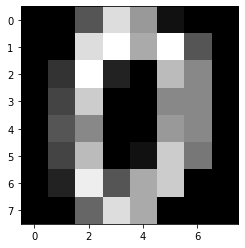

In [4]:
# digits에서 data를 digits_data에 저장
digits_data = digits.data
print(digits_data.shape)

# 자료가 image이므로 matplotlib의 pyplot을 이용하여 1번째 데이터 확인
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

=> digits_data는 1797개의 데이터를 가지고 있고 
   8x8의 이미지가 flatten되어 64개의 feature로 저장되어 있음을 확인함.

In [5]:
# 정답지인 Label Data 지정
digits_label = digits.target

print(digits_label.shape)

digits_label[0]

(1797,)


0

In [6]:
# Target Names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### [ 데이터 Describe ]

sklearn에 있는 digit_data를 가지고 손글씨 이미지를 0~9까지 열 가지 카테고리로 분류해보는 작업에서 
digit은 'data', 'target', 'target_names', 'images', 'DESCR'의 정보를 가지고 있고,

features는 8X8의 1797개의 이미지로 flatten되어 64개의 데이터로 저장됨.
labels는 우리가 최종적으로 분류해야 할 0~9까지의 정답을 담고 있음을 확인할 수 있음.

## 4. train, test 데이터 분리

- 모델 학습과 테스트용 문제지와 정답지를 준비
- X_train, X_test, y_train, y_test를 생성

In [8]:
# sklearn의 train_test_split를 이용하여 데이터셋 분리

X_train, X_test, y_train, y_test = train_test_split(digits_data,   # 문제지(feature)
                                                    digits_label,  # 정답값(label)
                                                    test_size=0.2, # test_dataset의 크기
                                                    random_state=7) # 데이터 분리 랜덤성

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


## 5. 학습(Training)

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기
Random Forest 사용해 보기
SVM 사용해 보기
SGD Classifier 사용해 보기
Logistic Regression 사용해 보기

In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=5000)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.89      1.00      0.94        42
           2       0.93      0.95      0.94        40
           3       0.88      0.88      0.88        34
           4       0.97      0.95      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.84      0.88        43
           9       0.87      0.81      0.84        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
# SVM
from sklearn import svm

svm_model = svm.SVC()
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [12]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### (6) 모델 평가

# [Project 2] load_wine: 와인 분류

### => 와인의 어떤 특징으로 와인의 종류 분류

### (1) 필요한 모듈 import하기

> from sklearn.model_selection import train_test_split  <br/>
 from sklearn.metrics import classification_report

In [14]:
from sklearn.datasets import load_wine

### (2) 데이터 준비

* load_wine 메서드를 사용

In [15]:
wine = load_wine()

print(type(dir(wine))) # dir()을 이용하여 객체가 어떤 변수와 메서드를 가지는지 확인

<class 'list'>


### (3) 데이터 이해하기 -  데이터 자세히 뜯어보기.

   - Feature Data 지정하기
   - Label Data 지정하기
   - Target Names 출력해 보기
   - 데이터 Describe 해 보기

In [16]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
# [ Feature Data 지정 ]

# wine에서 data를 wine_data에 저장
wine_data = wine.data
print(wine_data.shape, '\n')
# 총 178개의 데이터가 각각 13개의 정보를 담고 있음

print("wine의 첫번째 데이터:",wine_data[0])

(178, 13) 

wine의 첫번째 데이터: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


In [18]:
# [ Label Data 지정, Target Names 출력 ]

wine_label = wine.target

print(wine_label.shape, '\n')
print("label 이름:", wine.target_names, '\n')      
print("feature 이름:", wine.feature_names, '\n')

wine_label

(178,) 

label 이름: ['class_0' 'class_1' 'class_2'] 

feature 이름: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
# [ 데이터 Describe ]

# wine 개요
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### (4) train, test 데이터 분리

* 모델 학습과 테스트용 문제지와 정답지를 준비
* X_train, X_test, y_train, y_test를 생성

In [20]:
# [모델 학습과 테스트용 문제지와 정답지를 준비 ]

import pandas as pd

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df["label"]=wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
# [ X_train, X_test, y_train, y_test를 생성 => 'train_test_split']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


### (5) 다양한 모델로 학습시켜보기

   * Decision Tree
   * Random Forest
   * SVM 
   * SGD Classifier
   * Logistic Regression

### [ Decision Tree ]

In [22]:
# Decision Tree 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [23]:
# 학습

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=32, splitter='best')

In [24]:
# 예측

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### [ Random Forest ]

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### [ SVM ]

In [26]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.55      1.00      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.58        36
   macro avg       0.45      0.52      0.46        36
weighted avg       0.41      0.58      0.46        36



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### [ SGD Classifier ]

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.18      0.30        17
           2       0.43      0.83      0.57        12

    accuracy                           0.56        36
   macro avg       0.71      0.67      0.56        36
weighted avg       0.75      0.56      0.49        36



### [ Logistic Regression ]

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### (6) 모델 평가

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

# [Project 3] load_breast_cancer: 유방암 진단

### => 데이터로 환자의 유방암 여부 분류

In [29]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# (2) 데이터 준비
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [30]:
# (4-1) 모델 학습 및 예측 - [ Decision Tree ]
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [31]:
# (4-2) 모델 학습 및 예측 -[ Random Forest ]
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
# (4-3) 모델 학습 및 예측 -[ SVM ]
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.65      1.00      0.79        74

    accuracy                           0.65       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.42      0.65      0.51       114



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
# (4-4) 모델 학습 및 예측 -[SGD Classifier ]
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        40
           1       0.94      0.86      0.90        74

    accuracy                           0.88       114
   macro avg       0.86      0.88      0.87       114
weighted avg       0.89      0.88      0.88       114



In [34]:
# (4-4) 모델 학습 및 예측 -[ Logistic Regression ]
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
